In [2]:
# -*- coding: utf-8 -*-
# =============================================================================
# Logistic Regression
# =============================================================================

# Libaries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Dataset
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, [2,3]].values # Predicting only Age and EstimatedSalary
y = dataset.iloc[:, 4].values

In [3]:
# Train/Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [4]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [5]:
# Model training
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [6]:
# Predictions
y_pred = classifier.predict(X_test)

In [7]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

<ipython-input-8-2f87aa8146ac>:22: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


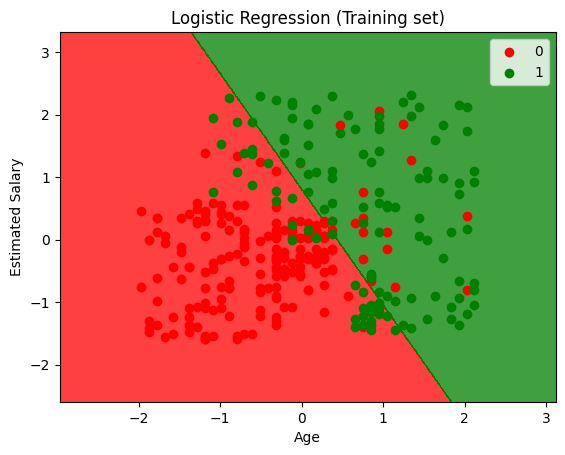

In [8]:
### Visualization
from matplotlib.colors import ListedColormap

def visualization(X,y):
    X_set, y_set = X, y # Auxiliary variables

    # Obtaining the twi Xi used
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                         np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01)) # Preparing grids with pixel points. -1/+1 is for having a bit of margin


    # The regions are painted according to whether or not they are above the classifier
    plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha = 0.75, cmap = ListedColormap(('red', 'green'))) # contourf to paint the outline. I use my classification function to paint the points of one color or another according to the estimate

    # With this it is allowed to embed the following points on the previous graph
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())

    # Painting datapoints
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    c = ListedColormap(('red', 'green'))(i), label = j) # loop for painting all points
    plt.title('Logistic Regression (Training set)')
    plt.xlabel('Age')
    plt.ylabel('Estimated Salary')
    plt.legend()
    plt.show()

# Train
visualization(X_train, y_train)


<ipython-input-8-2f87aa8146ac>:22: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


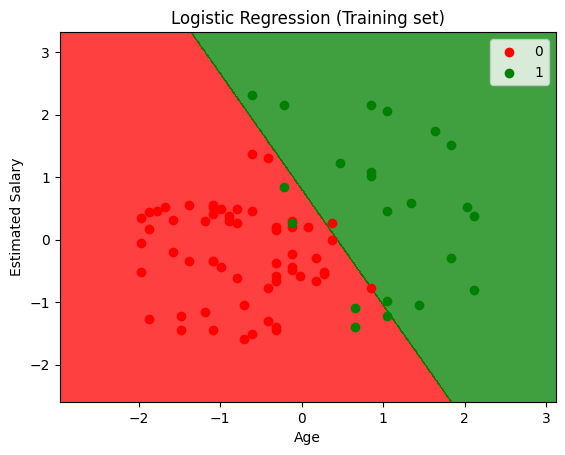

In [9]:

# Test
visualization(X_test, y_test)